In [1]:
import math
import cmath 
import numpy as np
import matplotlib.pyplot as plt
from skrf import Network, Frequency
from skrf.media import DistributedCircuit
from skrf import Frequency
from skrf import network
from skrf.network import *

from skrf import plotting 


from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 14,
          'figure.figsize': (10, 10),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)




In [2]:

def Nparallel(freq, ya, yb, z0=50):
    y = np.empty(shape=(len(freq.f),2,2), dtype=complex)
    for i,f in enumerate(freq.f):
        y[i,0,0] =  ya[i,0,0] +  yb[i,0,0]
        y[i,0,1] =  ya[i,0,1] +  yb[i,0,1]
        y[i,1,0] =  ya[i,1,0] +  yb[i,1,0]
        y[i,1,1] =  ya[i,1,1] +  yb[i,1,1]
    a = network.y2s(y,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk



## Convierte a network de skrf una admitancia.
def Nadmi(freq, yb, z0=50):
    y = np.empty(shape=(len(freq.f),2,2), dtype=complex)
    for i,f in enumerate(freq.f):
        y[i,0,0] =   yb
        y[i,0,1] =  -yb
        y[i,1,0] =  -yb
        y[i,1,1] =   yb
    a = network.y2s(y,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk


In [3]:
def Linvill(yt, showme = False):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    C = (abs(y12*y21))/(2*y11.real*y22.real-(y12*y21).real)
    if showme:
        print('###############  LINVILL   #####################')
        print( 'coeficiente de linvill C= {:4.2F}' .format(C))
        if C < 1:
            print( 'Es incondicionalmente estable')
        else :
            print( 'Es potencialmente inestable')
    return C

def cosas():
    yin  = y11 - (y21*y12)/(y22+yl)
    yout = y22 - (y21*y12)/(y11+yg)
    print( 'yin  = {0.real:4.3F} {0.imag:4.2E}' .format(yin) )
    print( 'rin  = {0.real:4.3F} ' .format(1/yin.real) )
    
    print( 'yout = {0.real:4.3F} {0.imag:4.2E}' .format(yout) )
    print( 'rout = {0.real:4.3F} ' .format(1/yout.real) )
    
    
    Gg = yin.real/(yg+yin).real
    G  = abs(y21)**2 *yl.real /(yin).real  /(y22+yl).real**2
    Gt = 4* abs(y21)**2 *yl.real *yg.real /abs((y11+yg)*(y22+yl)-y21*y12)**2
    
    print( 'Gg= {0.real:4.2F} ' .format((Gg)))
    print( 'G = {0.real:4.2F} ' .format((G )))
    print( 'Gt= {0.real:4.2F} dB' .format((10*np.log10(Gt) )))

def Stern(yg, yl, yt, showme = False):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    K = (2*(y11.real+yg.real)*(y22.real+yl.real)) / (abs(y12*y21)+(y12*y21).real)
    if showme:
        print('###############  STERN   #####################')
        print( 'coeficiente de stern K= {:4.2F}' .format(K))
        if K > 1:
            print( 'Estable')
        else :
            print( 'Inestable')
    return K        
      
    





def neutraliza(yt,wo,n = 1):
    Cn = -yt[0,1].imag/wo*n
    y11 =  wo*Cn*1j
    y12 =  wo*Cn*1j/n
    y21 =  wo*Cn*1j/n
    y22 =  wo*Cn*1j/n**2
    yn  = np.matrix([[y11, y12],[ y21, y22]])
    # cuadripolo resultante
    ytn  = yt + yn
    print('cap=',Cn, 'n=', n)
    return (ytn,Cn)


def realimenta(yt,yf):
    y11 =   yf
    y12 =  -yf
    y21 =  -yf
    y22 =   yf  
    yn  = np.matrix([[y11, y12],[ y21, y22]])
    # cuadripolo resultante
    ytn  = yt + yn
    return (ytn)

def printS(S1):
    s11 =   S1[0,0]
    s12 =   S1[0,1]
    s21 =   S1[1,0]
    s22 =   S1[1,1]
    print( 's11= {:4.3f}  {:4.2f}' .format(abs(s11),np.angle(s11)*180/np.pi ))
    print( 's12= {:4.3f}  {:4.2f}' .format(abs(s12),np.angle(s12)*180/np.pi ))
    print( 's21= {:4.3f}  {:4.2f}' .format(abs(s21),np.angle(s21)*180/np.pi ))
    print( 's22= {:4.3f}  {:4.2f}' .format(abs(s22),np.angle(s22)*180/np.pi ))

def printY(Y1):
    y11 =   Y1[0,0]
    y12 =   Y1[0,1]
    y21 =   Y1[1,0]
    y22 =   Y1[1,1]
    print( 'y11= {0.real:4.2E}  {0.imag:4.2E}j' .format(y11) )
    print( 'y12= {0.real:4.2E}  {0.imag:4.2E}j' .format(y12) )
    print( 'y21= {0.real:4.2E}  {0.imag:4.2E}j' .format(y21) )
    print( 'y22= {0.real:4.2E}  {0.imag:4.2E}j' .format(y22) )
    print(' ')

    print( 'r11= {0.real:4.2F}' .format(1/y11.real) )
    print( 'c11= {0.real:4.2E}' .format(y11.imag/wo) )


    print( 'gm = {0.real:4.2F}' .format(abs(y21)) )
    print( 'gr = {0.real:4.4F}' .format(abs(y12)) )

    print( 'r22= {0.real:4.2F}' .format(1/y22.real) )
    print( 'c22= {0.real:4.2E}' .format(y22.imag/wo) )

  
    return

def Linvill2(net):
    c = list()
    for n in net:
        c.append(Linvill(n))
    return c


def Stern2(net, yg, yl):
    c = list()
    for n in net:
        c.append(Stern(yg,yl,n))
    return c

def realimenta(net, yf):
    netf = list()
    for yn in net:
        netf.append(realimenta(yn,yf) )
    return netf  
        

In [9]:
npn = Network('SPAR/BFP460/BFP460_w_noise_VCE_2.5V_IC_5.0mA.s2p')


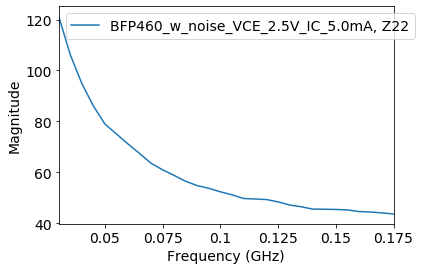

In [21]:
freq = Frequency(31,200,231,'mhz')


npn[0:30].plot_z_mag(m=1,n=1)

In [39]:
yf    = Nadmi(freq, 1/2e3)
mynpn = Nparallel(freq, npn[freq], yf, z0=50)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

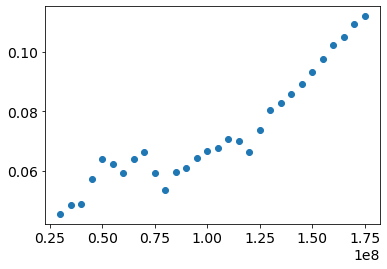

In [23]:
plt.plot(npn[0:30].f,npn[0:30].stability, 'o')

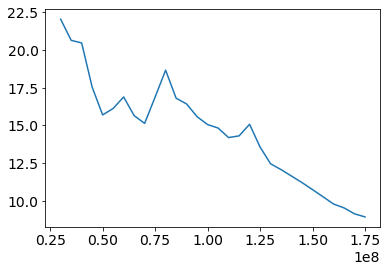

In [29]:
C = Linvill2(npn[0:30].y)
plt.plot(npn.f[0:30],Cbpf)

In [35]:
mynpn = realimenta(npn, 1/2e3)

C = Linvill2(mynpn[0:30].y)
plt.semilogy(mynpn.f[0:30], C)

ValueError: x and y arrays must have at least 2 entries

In [ ]:
fo = 50e6
wo = 2*np.pi*fo

print('Parametros S 50MHz (3V10mA):')

printS(BFP720['50mhz'].s[0])
print(' ')

print('Parametros Y 50MHz (3V10mA):')
Y100 = BFP720['50mhz'].y[0]

printY(Y100)

In [ ]:
print( BFP720['30-80mhz'].f, BFP720['30-80mhz'].y[:])

In [ ]:
Linvill(Y100)


In [ ]:
ytn  =  realimenta(Y100,wo,1/2.3e3 )

printY(ytn)

Linvill(ytn)


In [ ]:
yg = (1/50 ) - 7.27E-04j
print((-yg.imag/wo) )

yl= (1/120 ) - 2.78E-04j
print(-yl.imag/wo) 


Stern(yg, yl, ytn)